In [1]:
# Importing Required Modules
import cv2
import numpy as np
from skimage.morphology import skeletonize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

# Root directory ControlNet-Trees
ROOT_DIR = os.path.dirname(os.path.abspath(''))
ROOT_DIR_GIS = os.path.join(ROOT_DIR, 'Google-Image-Scraper')
OUTPUT_DIR = os.path.join(ROOT_DIR_GIS,'photos','tree_steps')


DATASET_DIR = os.path.join(ROOT_DIR_GIS, 'photos','test_dataset')

### Remove background + binarize + skeletonize

In [7]:
# Only one image
from skeletonize import dev_skeleton_pipeline

dev_skeleton_pipeline(ROOT_DIR_GIS, os.path.join('photos','tree','tree8.webp'))

'Image 8 processed and results saved'

#### Build Dataset

In [3]:
# All images in input folder
from build_dataset import build_dataset_from_folder

in_folder = os.path.join(ROOT_DIR_GIS, 'photos','test_small')

build_dataset_from_folder(in_folder, os.path.join(ROOT_DIR_GIS, 'photos','test_s_dataset'))

Folder 'Apple' added to Dataset (new size 9 images)
Folder 'orange' added to Dataset (new size 19 images)
Folder 'single tree image hd' added to Dataset (new size 28 images)


In [2]:
from build_dataset import generate_img_captions

generate_img_captions(DATASET_DIR)

c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Resolving data files: 100%|██████████| 98/98 [00:00<?, ?it/s]
Found cached dataset imagefolder (C:/Users/viscom/.cache/huggingface/datasets/imagefolder/test_dataset-a3db2f81151b8a67/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)
c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\transformers\generation\utils.py:1363: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-p

##### Dataset test & debug

In [2]:
from build_dataset import generate_img_captions

DATASET_S_DIR = os.path.join(ROOT_DIR_GIS, 'photos','test_s_dataset')
generate_img_captions(DATASET_S_DIR)

c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Resolving data files: 100%|██████████| 28/28 [00:00<?, ?it/s]
Found cached dataset imagefolder (C:/Users/viscom/.cache/huggingface/datasets/imagefolder/test_s_dataset-8933df10b080af66/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


In [ ]:
# All images in input folder
from build_dataset import build_dataset_from_folder

in_folder = os.path.join(ROOT_DIR_GIS, 'photos','test')

build_dataset_from_folder(in_folder, DATASET_DIR)

c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\rembg\sessions\base.py:49: RuntimeWarning: invalid value encountered in divide
  im_ary = im_ary / np.max(im_ary)
c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\rembg\sessions\u2net.py:29: RuntimeWarning: invalid value encountered in cast
  mask = Image.fromarray((pred * 255).astype("uint8"), mode="L")
c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Folder Apple added to Dataset (new size 28 images)
Folder Banana added to Dataset (new size 56 images)
Folder Lone tree istock images added to Dataset (new size 66 images)
Folder orange added to Dataset (new size 89 images)
Folder single tree image hd added to Dataset (new size 98 images)


In [24]:

from datasets import load_dataset

dataset = load_dataset(DATASET_DIR, split="train")
dataset

Found cached dataset json (C:/Users/viscom/.cache/huggingface/datasets/json/dataset-f2dc883c093bdb94/0.0.0/8bb11242116d547c741b2e8a1f18598ffdd40a1d4f2a2872c7a28b697434bc96)


Dataset({
    features: ['text', 'image', 'conditioning_image'],
    num_rows: 9
})

In [16]:
dataset['train'][0]

{'text': '',
 'image': 'images/0.png',
 'conditioning_image': 'conditioning_images/0.png'}

In [3]:
from transformers import pipeline, AutoProcessor
from transformers.pipelines.pt_utils import KeyDataset
from datasets import load_dataset, Image

pipe = pipeline(model="microsoft/git-base-coco", device=0)
image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning", device=0)
# img_filenames = [row['image'] for row in dataset['train']]

dataset = load_dataset(path = DATASET_DIR, data_dir="images" ,split="train").cast_column("image", Image())
print("git-base-coco model:")
for out in pipe(KeyDataset(dataset, "image")):
    print(out[0]["generated_text"])

print("vit-gpt2-image-captioning model:")
for out2 in image_to_text(KeyDataset(dataset, "image")):
    print(out2)


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Resolving data files: 100%|██████████| 98/98 [00:00<?, ?it/s]
Found cached dataset imagefolder (C:/Users/viscom/.cache/huggingface/datasets/imagefolder/test_dataset-a3db2f81151b8a67/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


computer hardware business has been operating system software since its current owner's company.
the most important thing in the world is to eat apples.
a close up of a computer screen with a logo on it.
computer hardware business has created a logo that can be seen in the dark.
red apple with green leaf on a white background.
computer hardware business on a blue background.
computer hardware business has been making a logo for years
computer hardware business - - the first logo in the world
computer hardware business - - the first logo in the world
icon with an apple on the screen
a woman is standing in front of a logo.
the logo is a symbol of the company's company.
computer hardware business - - the logo for computer hardware business
part of a black background
a bunch of apples on a cutting board.
the logo is a symbol of the company's logo.
a red apple isolated on a white background


c:\Users\viscom\workspace\tree_project\ControlNet-Trees\venv\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


a red and yellow apple on a white plate.
the evolution of the apples
computer hardware business has been working on the internet.
computer hardware business has a logo that says the logo.
banana with a wooden handle
a bunch of bananas sitting on a blue surface.
the logo is seen at the company's headquarters.
a bunch of bananas sitting on top of a table.
a pink background with a bunch of bananas
a banana on a white background - - stock vector #
a bunch of bananas on a stalk
a bunch of bananas that are on a white background.
a banana that is sitting on a table.
a large bunch of bananas that are on a tree.
a banana with a sticker on it
a bunch of bananas on a white background
a bunch of bananas with a cut out of it
computer hardware business - - the apple of the future
bananas and bananas in a bowl
a ripe banana on a white background
a banana on a blue background
a bunch of ripe bananas on a wooden background.
a bunch of ripe bananas on a wooden background.
bananas and milk on a wooden cu

### Opening and Closing
Improve binary image by applying [morphological transformations](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html):
1. opening: remove white noise
2. closing: fill holes 

In [26]:
from skeletonize import opening_closing

def display_open_close(img_nr):
    output_path_bin = os.path.join(OUTPUT_DIR, f'tree{img_nr}_binary.png')
    img = cv2.imread(output_path_bin, cv2.IMREAD_GRAYSCALE)

    opening, closing = opening_closing(img)

    # save image closing
    cv2.imwrite(os.path.join(OUTPUT_DIR, f'tree{img_nr}_closing.png'), closing)

    # Display the results and their skeletons
    fig, ax = plt.subplots(2, 3, figsize=(12, 6))
    ax = np.ravel(ax)
    [axi.set_axis_off() for axi in ax]
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original')
    ax[1].imshow(opening, cmap='gray')
    ax[1].set_title('Opening')
    ax[2].imshow(closing, cmap='gray')
    ax[2].set_title('Closing')
    ax[3].imshow(skeletonize(img), cmap='gray')
    ax[4].imshow(skeletonize(opening), cmap='gray')
    ax[5].imshow(skeletonize(closing), cmap='gray')
    plt.show()

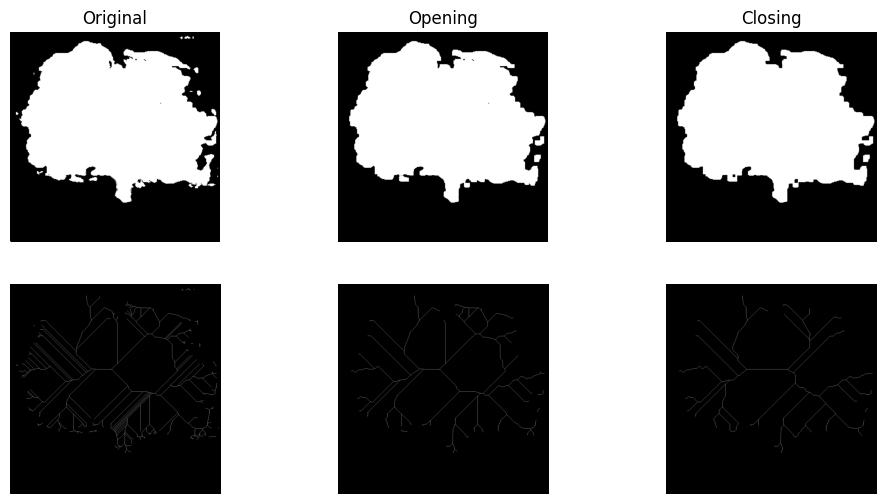

In [27]:
display_open_close(8)

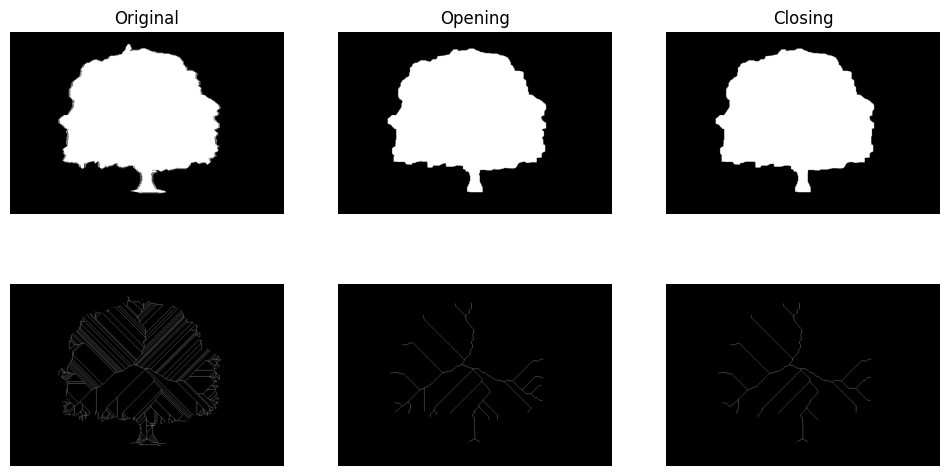

In [28]:
display_open_close(2)

An error occurred: No such file: 'c:\Users\viscom\workspace\tree_project\ControlNet-Trees\Google-Image-Scraper\photos\tree_skeleton\tree4_skel.png'


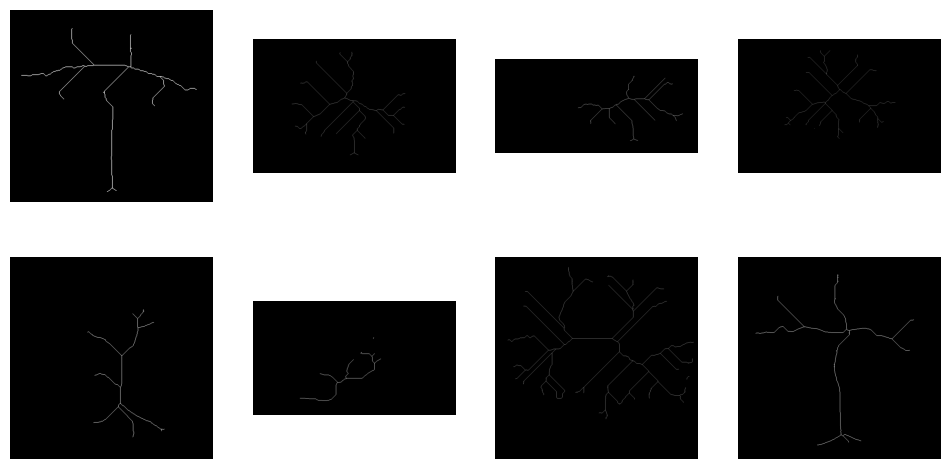

In [32]:
# display all skeleton images
in_folder = os.path.join(ROOT_DIR_GIS, 'photos','tree_skeleton')

fig, ax = plt.subplots(2, 4, figsize=(12, 6))
ax = np.ravel(ax)
[axi.set_axis_off() for axi in ax]
ax_nr = 0
for img_nr in range(1,10):
    try:
        img = imread(os.path.join(in_folder, f'tree{img_nr}_skel.png'))
        ax[ax_nr].imshow(img, cmap='gray')
        ax_nr += 1
    except Exception as error:
        print("An error occurred:", error)

plt.show()

### Depth image

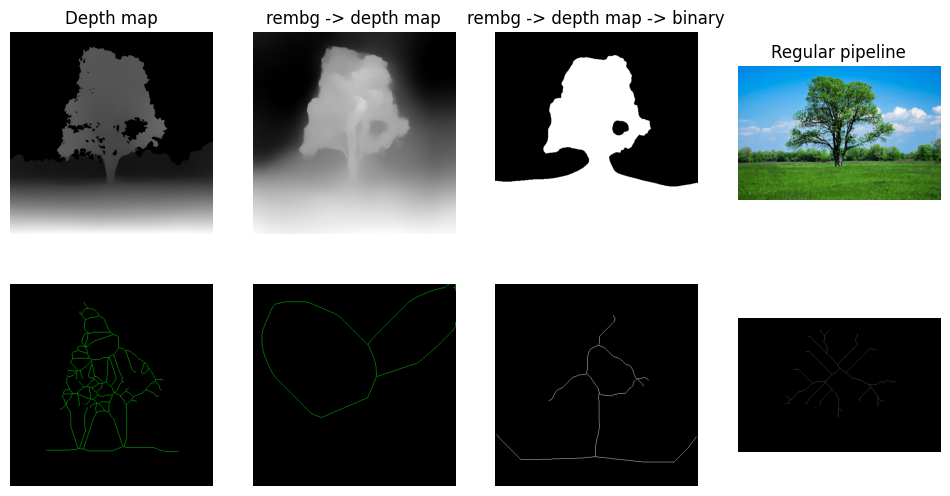

In [24]:
"""
import sys
sys.path.append('../../stable-diffusion-webui/extensions/sd-webui-controlnet')
from annotator.midas import MidasDetector
"""
from controlnet_aux import MidasDetector

img_nr = 5
img_path = os.path.join(OUTPUT_DIR, f'tree{img_nr}.jpeg') #.webp')
#img_rembg_path = os.path.join(OUTPUT_DIR, f'tree{img_nr}_rembg.png')
img = Image.open(img_path).resize((512, 512))

midas = MidasDetector.from_pretrained("lllyasviel/Annotators")

# Image to depth map
depth_img = midas(img)
depth_img.save(os.path.join(OUTPUT_DIR, f'tree{img_nr}_depth.png'))
skeleton = skeletonize(np.asarray(depth_img))

# Image(removed background) to depth map
#img = remove(img)
img_rembg_path = os.path.join(OUTPUT_DIR, f'tree{img_nr}_rembg.png')
img = Image.open(img_rembg_path).resize((512, 512))
depth_bgimg = midas(img)
depth_bgimg.save(os.path.join(OUTPUT_DIR, f'tree{img_nr}_bgdepth.png'))
skeleton_bg = skeletonize(np.asarray(depth_bgimg))

# Image (rembg & binary) to depth map
depth_cv2 = cv2.cvtColor(np.asarray(depth_bgimg), cv2.COLOR_RGB2GRAY)
th, bin_img = cv2.threshold(depth_cv2, 150, 255, cv2.THRESH_BINARY)
skeleton_bin = skeletonize(np.asarray(bin_img))

# Regular pipeline
img_orig = imread(os.path.join(OUTPUT_DIR, f'tree{img_nr}.jpeg'))
img_bin = cv2.imread(os.path.join(OUTPUT_DIR, f'tree{img_nr}_binary.png'), cv2.IMREAD_GRAYSCALE)
img_skel = cv2.imread(os.path.join(OUTPUT_DIR, f'tree{img_nr}_skel.png'), cv2.IMREAD_GRAYSCALE)

# Display all images
fig, ax = plt.subplots(2, 4, figsize=(12, 6))
[axi.set_axis_off() for axi in ax.ravel()]
ax[0,0].set_title('Depth map')
ax[0,0].imshow(depth_img, cmap='gray')
ax[1,0].imshow(skeleton, cmap='gray')
ax[0,1].set_title('rembg -> depth map')
ax[0,1].imshow(depth_bgimg, cmap='gray')
ax[1,1].imshow(skeleton_bg, cmap='gray')
ax[0,2].set_title('rembg -> depth map -> binary')
ax[0,2].imshow(bin_img, cmap='gray')
ax[1,2].imshow(skeleton_bin, cmap='gray')
ax[0,3].set_title('Regular pipeline')
ax[0,3].imshow(img_orig, cmap='gray')
ax[1,3].imshow(img_skel, cmap='gray')


plt.show()

### Compare diff skel algos
https://scikit-image.org/docs/stable/auto_examples/edges/plot_skeleton.html

In [16]:
from skimage.morphology import medial_axis, skeletonize
import matplotlib.pyplot as plt
from skimage.io import imread


def compare_skel_algos(img_nr):
    output_path_bin = os.path.join(ROOT_DIR_GIS, 'photos','tree_skeleton',f'tree{img_nr}_binary.png')
    img = imread(output_path_bin)

    # Compute the medial axis (skeleton) and the distance transform
    skel, distance = medial_axis(img, return_distance=True)

    # Compare with other skeletonization algorithms
    skeleton = skeletonize(img)
    skeleton_lee = skeletonize(img, method='lee')

    # Distance to the background for pixels of the skeleton
    dist_on_skel = distance * skel

    fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('original')
    ax[0].axis('off')

    #ax[1].imshow(dist_on_skel, cmap='magma')
    #ax[1].contour(img, [0.5], colors='w')
    ax[1].imshow(skel, cmap=plt.cm.gray)
    ax[1].set_title('medial_axis')
    ax[1].axis('off')

    ax[2].imshow(skeleton, cmap=plt.cm.gray)
    ax[2].set_title('skeletonize')
    ax[2].axis('off')

    ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
    ax[3].set_title("skeletonize (Lee 94)")
    ax[3].axis('off')

    fig.tight_layout()
    plt.show()

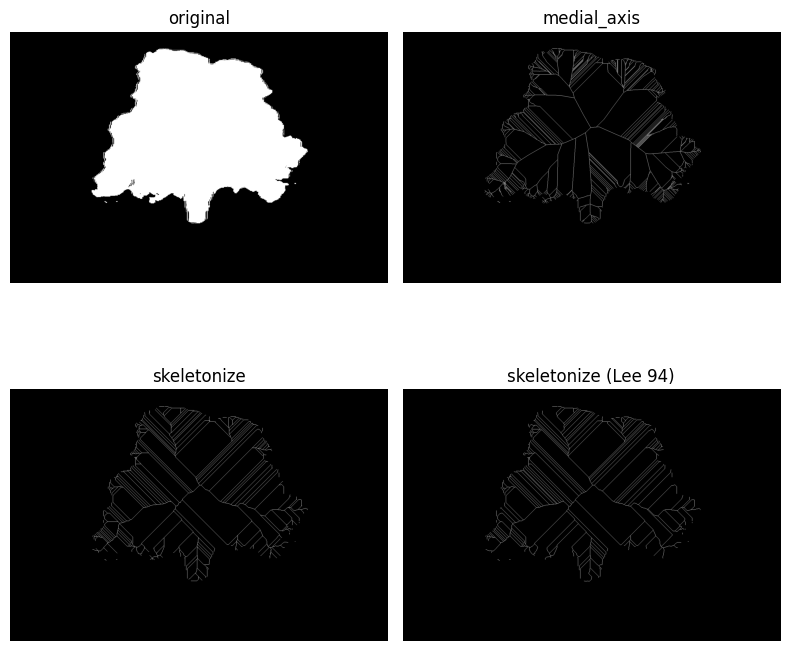

In [20]:
compare_skel_algos(5)

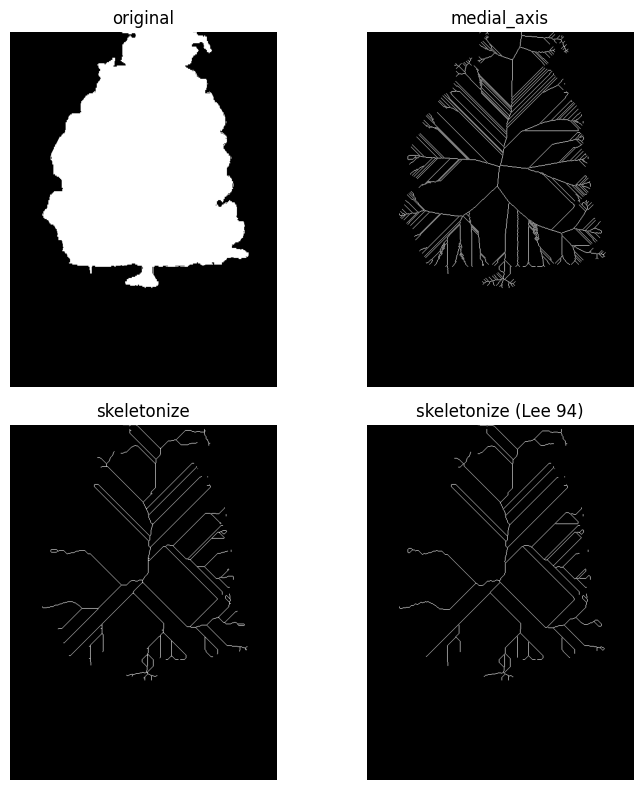

In [28]:
compare_skel_algos(0)

### Auto-generating prompts with Image captioning
https://huggingface.co/docs/transformers/main/model_doc/blip-2#transformers.Blip2ForConditionalGeneration

In [4]:
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import torch
import requests

device = "cuda" if torch.cuda.is_available() else "cpu"
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
)

model.to(device)


Loading checkpoint shards: 100%|██████████| 2/2 [00:45<00:00, 22.55s/it]


Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

In [5]:
def generate_caption(img_path):
    # url = "http://images.cocodataset.org/val2017/000000039769.jpg"
    # image = Image.open(requests.get(url, stream=True).raw)
    image = Image.open(img_path)
    inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)
    

    generated_ids = model.generate(**inputs, max_new_tokens=20)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()

    return generated_text

img_path = os.path.join(ROOT_DIR_GIS,'photos','tree','tree8.webp')
generate_caption(img_path)

'a large tree in a field'

https://huggingface.co/Salesforce/blip-image-captioning-base#running-the-model-on-gpu

In [ ]:
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base", torch_dtype=torch.float16).to("cuda")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

In [4]:
# GIT (Generative Image-to-text Transformer) image captioning
# https://huggingface.co/docs/transformers/main/model_doc/git#transformers.GitForCausalLM.forward.example

from transformers import AutoProcessor, AutoModelForCausalLM
import requests
from PIL import Image

processor = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco")

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
img_path = os.path.join(ROOT_DIR_GIS,'photos','tree','tree8.webp')
image = Image.open(img_path)

pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

a lone tree in a green field


In [6]:
# Caption all images in input folder
in_folder = os.path.join(ROOT_DIR_GIS, 'photos','test','single tree image hd')
img_list = get_files_folder(in_folder)
for img in img_list:
    try:
        print(generate_caption(img))
    except Exception as error:
        print("An error occurred:", error)

An error occurred: The size of tensor a (730) must match the size of tensor b (257) at non-singleton dimension 1
An error occurred: The size of tensor a (730) must match the size of tensor b (257) at non-singleton dimension 1
An error occurred: The size of tensor a (730) must match the size of tensor b (257) at non-singleton dimension 1
An error occurred: The size of tensor a (730) must match the size of tensor b (257) at non-singleton dimension 1
An error occurred: The size of tensor a (730) must match the size of tensor b (257) at non-singleton dimension 1
An error occurred: The size of tensor a (730) must match the size of tensor b (257) at non-singleton dimension 1
An error occurred: The size of tensor a (730) must match the size of tensor b (257) at non-singleton dimension 1
An error occurred: The size of tensor a (730) must match the size of tensor b (257) at non-singleton dimension 1
An error occurred: The size of tensor a (730) must match the size of tensor b (257) at non-singl